## Support Vector Machine

### Reading Files

In [16]:
import pandas as pd

test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [17]:
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [18]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


### Main Code

##### Getting unique Features

In [19]:
for i in train:
    print(i)

tBodyAcc-mean()-X
tBodyAcc-mean()-Y
tBodyAcc-mean()-Z
tBodyAcc-std()-X
tBodyAcc-std()-Y
tBodyAcc-std()-Z
tBodyAcc-mad()-X
tBodyAcc-mad()-Y
tBodyAcc-mad()-Z
tBodyAcc-max()-X
tBodyAcc-max()-Y
tBodyAcc-max()-Z
tBodyAcc-min()-X
tBodyAcc-min()-Y
tBodyAcc-min()-Z
tBodyAcc-sma()
tBodyAcc-energy()-X
tBodyAcc-energy()-Y
tBodyAcc-energy()-Z
tBodyAcc-iqr()-X
tBodyAcc-iqr()-Y
tBodyAcc-iqr()-Z
tBodyAcc-entropy()-X
tBodyAcc-entropy()-Y
tBodyAcc-entropy()-Z
tBodyAcc-arCoeff()-X,1
tBodyAcc-arCoeff()-X,2
tBodyAcc-arCoeff()-X,3
tBodyAcc-arCoeff()-X,4
tBodyAcc-arCoeff()-Y,1
tBodyAcc-arCoeff()-Y,2
tBodyAcc-arCoeff()-Y,3
tBodyAcc-arCoeff()-Y,4
tBodyAcc-arCoeff()-Z,1
tBodyAcc-arCoeff()-Z,2
tBodyAcc-arCoeff()-Z,3
tBodyAcc-arCoeff()-Z,4
tBodyAcc-correlation()-X,Y
tBodyAcc-correlation()-X,Z
tBodyAcc-correlation()-Y,Z
tGravityAcc-mean()-X
tGravityAcc-mean()-Y
tGravityAcc-mean()-Z
tGravityAcc-std()-X
tGravityAcc-std()-Y
tGravityAcc-std()-Z
tGravityAcc-mad()-X
tGravityAcc-mad()-Y
tGravityAcc-mad()-Z
tGravityAcc-m

In [20]:
unique = []

for i in train['Activity']:
    if i in unique:
        continue
    else:
        unique.append(i)

print(unique)

['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']


In [21]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

X_train = train.drop(columns='Activity')
y_train = train['Activity']

X_test = test.drop(columns='Activity')
y_test = test['Activity']

print(train['Activity'].value_counts())
X_train.shape,y_train.shape

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64


((7352, 562), (7352,))

In [22]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_classifier = SVC(kernel='linear', C=1)

svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9565659993213438


##### Visualize the SVM

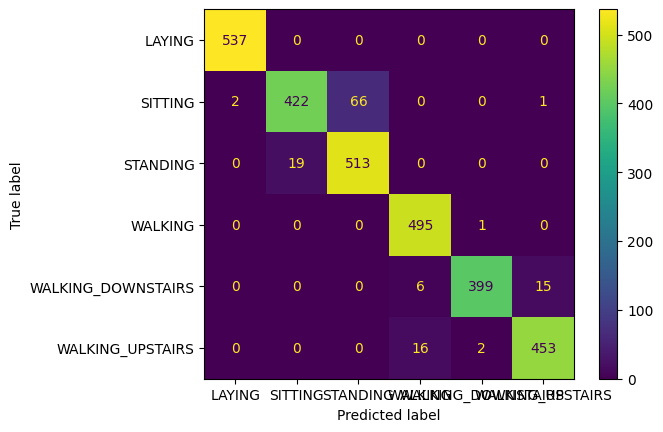

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_classifier.classes_)
disp.plot()
plt.show()


<Figure size 640x480 with 0 Axes>

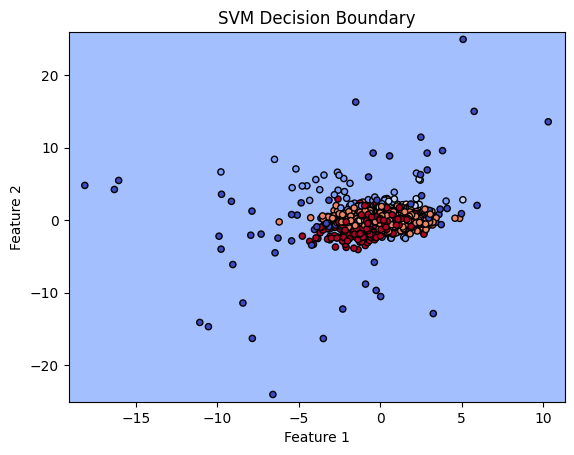

In [25]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

if X_train.shape[1] > 2:
  X_train_2d = X_train[:, :2]
  svm_classifier_2d = SVC(kernel='linear', C=1)
  svm_classifier_2d.fit(X_train_2d, y_train)
else:
  X_train_2d = X_train
  svm_classifier_2d = svm_classifier

plt.figure()
DecisionBoundaryDisplay.from_estimator(
    svm_classifier_2d,
    X_train_2d,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.8,
)

if y_train.dtype == 'object':
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y_train_numeric = le.fit_transform(y_train)
else:
    y_train_numeric = y_train

plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train_numeric, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM Decision Boundary")
plt.show()